# The Titanic Kaggle Competition

To begin, we will discuss [the competition](https://www.kaggle.com/c/titanic) and its objective.
We are given a data set, described [here](https://www.kaggle.com/c/titanic/data). Each row in the data set
represents a person who was aboard the Titanic when it sank. Each row has a number of traits to detail the person,
such as their name, sex, age, ticket they bought, fare, etc. The goal is to use this data, knowing who lived and who 
died, to predict if other passengers lived or died when the ship sank.

### Reading in the Data
Before we do anything, we will read in our data and get an idea of what it looks like. 
There are two data sets, the test data and the training data. The training data is what we will use to build our models that help us predict a passenger's outcome, and the testing data is the data we will predict, and eventually 
submit to Kaggle to gain a score. 

In [209]:
# import statements
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
# read in data
train_df = pd.read_csv("data/train.csv") 
test_df = pd.read_csv("data/test.csv")

In [211]:
# preview the training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
# preview the test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As we can see above, the training data has 12 columns that help give us an idea of who the passenger was. Additionally, with the training set, we are given a *Survived* column that is a 0 if the passenger died and a 1 if the passenger lived. This is what we will predict for the testing data.
Lets take a look at more detailed information about the datasets below.

In [213]:
# see info about data
train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

### Analyzing the Training set
Here we will analyze the data we were given to train with. To do this, we will make some graphs and analyze the obvious relationships in our data.

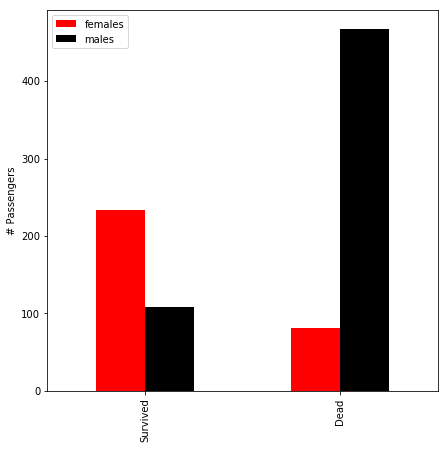

In [214]:

#Graph showing Gender Survival Rate

survived_sex = train_df[train_df['Survived']==1]['Sex'].value_counts()
dead_sex = train_df[train_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
objects = ['Survived','Dead']
df.index=objects

graph=df.plot(kind='bar', figsize=(7,7), color=['r','k'])

graph.set_ylabel("# Passengers")
plt.legend(['females','males'])

First, we graph how many men and women survived and died. As we can see, more women survived the disaster, implying that sex variable was a decisive feature in predicting a passenger's survival.
Next, we will take a look at the paseenger's survival rates with respect to their age.

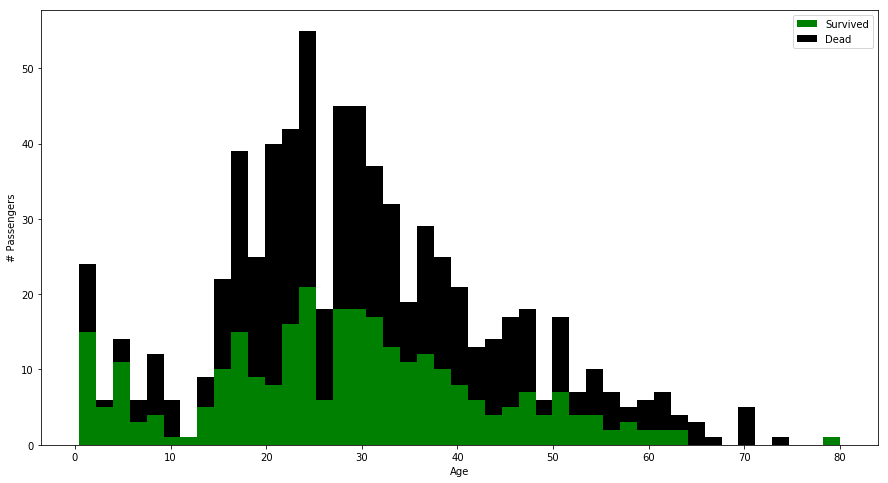

In [215]:
# delete NaN values because they cause issues with 
graph_df = train_df.dropna(subset=['Sex', 'Age'])


figure = plt.figure(figsize=(15,8))
plt.hist([graph_df[graph_df['Survived']==1]['Age'], graph_df[graph_df['Survived']==0]['Age']], stacked=True, color = ['g','k'],
         bins = 45,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('# Passengers')
plt.legend()

As we can see, younger passengers (age 0-8) had a much higher chance of survival than middle aged passengers. 

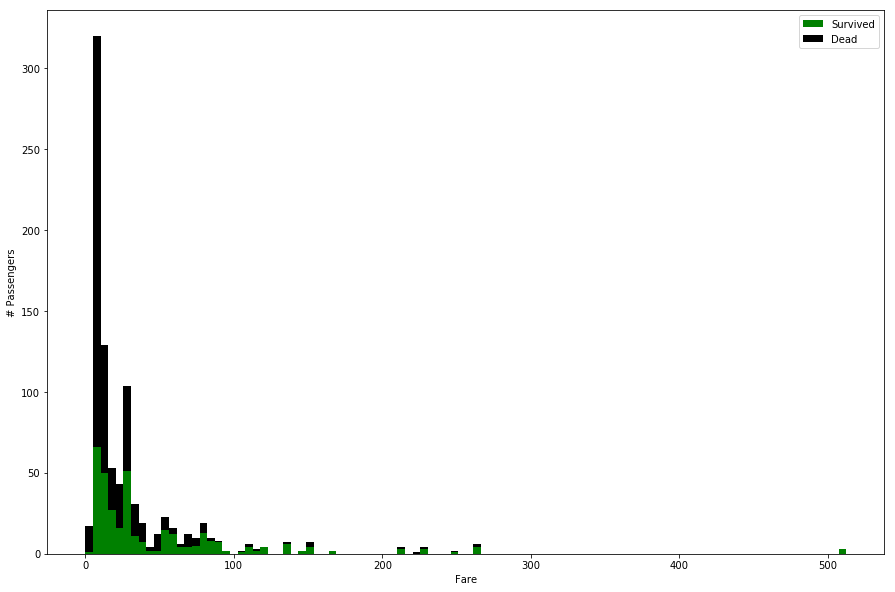

In [216]:
#Fare ticket survival

figure = plt.figure(figsize=(15,10))
plt.hist([train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], stacked=True, color = ['g','k'],
         bins = 100,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('# Passengers')
plt.legend()


This graph shows the passenger's chances of survival based on how much they paid for their ticket. Clearly, if you pay more, you are more likely to survive. Going off this logic, lets graph the likelihood of a passenger surviving based on their class.

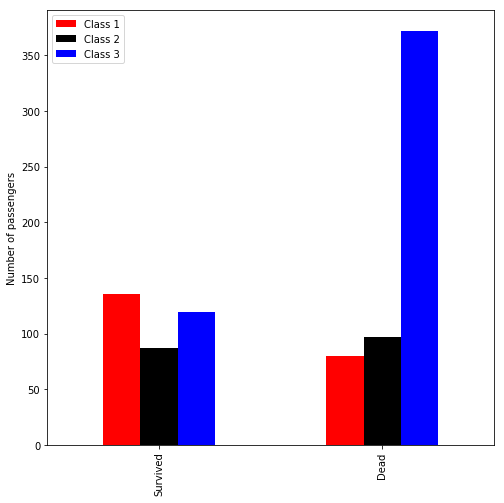

In [217]:
# Class survival

survived_class = train_df[train_df['Survived']==1]['Pclass'].value_counts()
dead_class = train_df[train_df['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived_class,dead_class])
objects = ['Survived','Dead']
df.index=objects

graph=df.plot(kind='bar', figsize=(8,8), color=['r','k','b'])

graph.set_ylabel("Number of passengers")
plt.legend(['Class 1','Class 2','Class 3'])




As expected, is is obvious that the higher the class you were in, the more likely you were to survive.

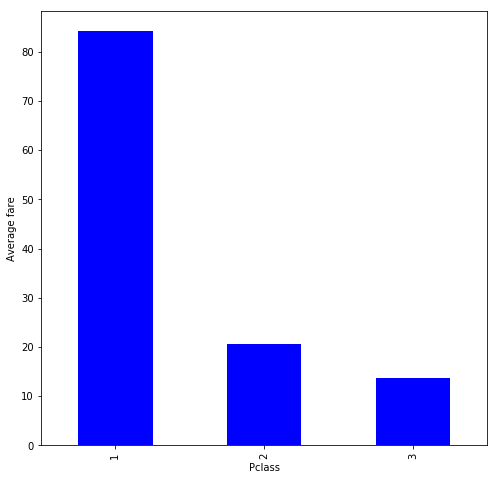

In [218]:
#Correlation between Fare and Class

graph = plt.subplot()
graph.set_ylabel('Average fare')
train_df.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(8,8), ax = graph, color='b')

Now, lets compare how much people paid on average for their fare based on their class. As we can see, higher classes paid more on average for their tickets (as we would expect).

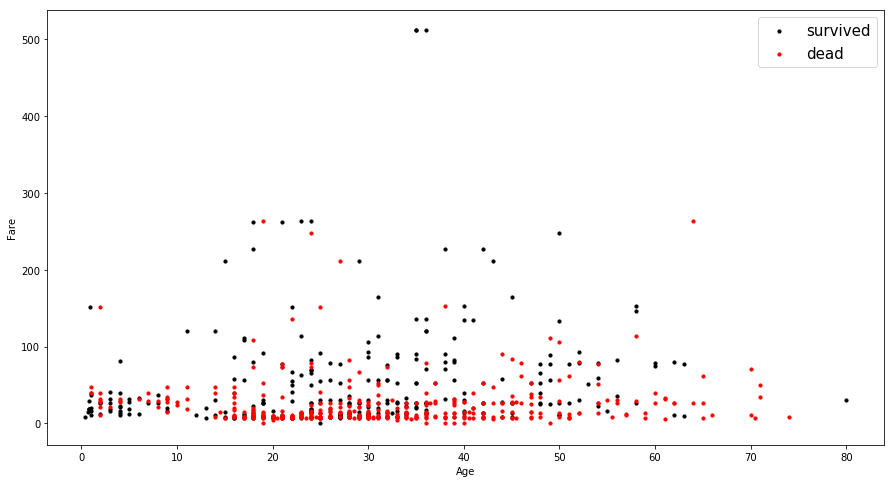

In [219]:
# Correlation between age and fare and their survival

plt.figure(figsize=(15,8))
graph = plt.subplot()
graph.scatter(train_df[train_df['Survived']==1]['Age'],train_df[train_df['Survived']==1]['Fare'],c='black',s=10)
graph.scatter(train_df[train_df['Survived']==0]['Age'],train_df[train_df['Survived']==0]['Fare'],c='red',s=10)
graph.set_xlabel('Age')
graph.set_ylabel('Fare')
graph.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)



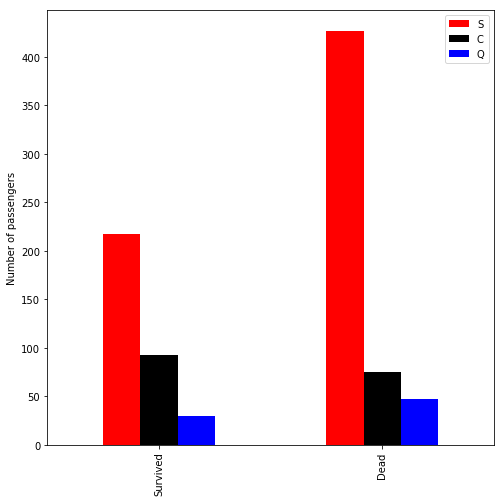

In [220]:
# Correlation between port of embarkation and survival


survived_emb = train_df[train_df['Survived']==1]['Embarked'].value_counts()
dead_emb = train_df[train_df['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_emb,dead_emb])
objects = ['Survived','Dead']
df.index=objects

graph=df.plot(kind='bar', figsize=(8,8), color=['r','k','b'])

graph.set_ylabel("Number of passengers")
plt.legend(['S','C','Q'])

Just in case, we will also check to see if you were more likely to survive if you embarked on the trip from a certain port. There appears to be some correlation between passengers who left port 'C' and surviving.

### Re-formatting the Data
As we can see above, our data comes in three data types, **float64(2), int64(4), object(5)**. 
The issue here is that most Sklearn and other Python Machine learning libraries do not accept object
data types. To work around this, we will convert all of our data to integers. 

First we have to address **NaN** values, which our libraries typically will not accept (Nor will our graphs).
For sex, we will set unknown genders to **male**, since we know the majority of passengers were male. Also, we know that passengers were more likely to die than servive the shipwreck, and men were more likely to die than women.

To address non-binary **NaN** values, typically we will set them the average value of the entire column. 
With this data set, this actually is not the best approach, and we will explain why later. For now, we will 
simply set them to the average.


In [221]:
# set nan for age to the mean of the age column
#train_df['Age'] = train_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
#test_df['Age'] = test_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

# set nan fare to the mean of the fare column
#train_df['Fare'] = train_df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))
#test_df['Fare'] = test_df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))

# make nan for sex male since men are more likely to not
# survive, and most dont survive
#train_df['Sex'] = train_df.groupby(['Pclass'])['Sex'].transform(lambda x: x.fillna('male'))
#test_df['Sex'] = test_df.groupby(['Pclass'])['Sex'].transform(lambda x: x.fillna('male'))

# set nan age to the mean of age column
train_df['Age'] = train_df['Age'].transform(lambda x: x.fillna(x.mean()))
test_df['Age'] = test_df['Age'].transform(lambda x: x.fillna(x.mean()))

# set nan fare to the mean of the fare column
train_df['Fare'] = train_df['Fare'].transform(lambda x: x.fillna(x.mean()))
test_df['Fare'] = test_df['Fare'].transform(lambda x: x.fillna(x.mean()))

# make nan for sex male since men are more likely to not
# survive, and most dont survive
train_df['Sex'] = train_df['Sex'].transform(lambda x: x.fillna('male'))
test_df['Sex'] = test_df['Sex'].transform(lambda x: x.fillna('male'))

In [222]:
# make everything ints
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
train_df['Fare'] = train_df['Fare'].astype(int)

# set men to 1 and female to 0
train_df['Sex'] = train_df['Sex'].map(lambda s : 1 if s == 'male' else 0)
test_df['Sex'] = test_df['Sex'].map(lambda s : 1 if s == 'male' else 0)

In [223]:
# set nan for age to the mean of the age column
#train_df['Age'] = train_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
#test_df['Age'] = test_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

# set nan fare to the mean of the fare column
#train_df['Fare'] = train_df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))
#test_df['Fare'] = test_df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))

# make nan for sex male since men are more likely to not
# survive, and most dont survive
#train_df['Sex'] = train_df.groupby(['Pclass'])['Sex'].transform(lambda x: x.fillna('male'))
#test_df['Sex'] = test_df.groupby(['Pclass'])['Sex'].transform(lambda x: x.fillna('male'))

test_df1 = test_df
train_df1 = train_df

# set nan age to the mean of age column
train_df1['Age'] = train_df1['Age'].transform(lambda x: x.fillna(x.mean()))
test_df1['Age'] = test_df1['Age'].transform(lambda x: x.fillna(x.mean()))

# set nan fare to the mean of the fare column
train_df1['Fare'] = train_df1['Fare'].transform(lambda x: x.fillna(x.mean()))
test_df1['Fare'] = test_df1['Fare'].transform(lambda x: x.fillna(x.mean()))

# make nan for sex male since men are more likely to not
# survive, and most dont survive
train_df1['Sex'] = train_df1['Sex'].transform(lambda x: x.fillna('male'))
test_df1['Sex'] = test_df1['Sex'].transform(lambda x: x.fillna('male'))

Now that we have addresses the **NaN** values and set the Age and Sex column to integers,
we can delete columns that appear to have little or no relevance.
We will delete the 'Ticket','Cabin', 'Embarked', 'Name' and 'PassengerId' Columns.

In [224]:
# clean data
test_df1 = test_df1.drop(['Ticket','Cabin', 'Embarked', 'Name', "PassengerId"], axis=1)
train_df1 = train_df1.dropna()
train_df1 = train_df1.drop(['Ticket','Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)
train_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,0,38,1,0,71
3,1,1,0,35,1,0,53
6,0,1,1,54,0,0,51
10,1,3,0,4,1,1,16
11,1,1,0,58,0,0,26


Here is our new dataset, which is much more simple. 

The reason we are making it very simple is so we can attempt a very naive, basic solution of training 
various models with this data set and seeing how our results score. Since this is an introductory competition,
we want to compare the results of many algorithms so we can move on with our best one.
To do this, we will define our X and Y for our training data, as well as our X for our testing data. Then, we will predict the results with thest X testing data for the following classifiers:
* Random Forest 
* Gradient Boost
* Extra Tree
* KNearest Neighbors
* Ada Boost
* Gaussian Naive Bayes

In [225]:
# a naive solution, ignoring other useful data relationships

# define data
X_train = train_df1.drop("Survived",axis=1)
Y_train = train_df1["Survived"]
X_test  = test_df1

In [226]:
# test random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.99009900990099009

Random Forest Kaggle Score: 0.72727

In [227]:
# gradient boost
#gradient_boost = GradientBoostingClassifier(n_estimators=100,loss='exponential',max_features='log2')
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, Y_train)

Y_pred_2 = gradient_boost.predict(X_test)

gradient_boost.score(X_train, Y_train)

0.97029702970297027

Gradient Boost Kaggle Score: 0.78468

In [228]:
# extra tree
#extra_tree = ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=10,max_features='log2',min_samples_split=10)
extra_tree = ExtraTreesClassifier(n_estimators=100)
extra_tree.fit(X_train, Y_train)

Y_pred_3 = extra_tree.predict(X_test)

extra_tree.score(X_train, Y_train)

0.99009900990099009

Extra Tree Kaggle Score: 0.71770

In [229]:
# kNearest Neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 7,weights='distance')
knn.fit(X_train, Y_train)
Y_pred_4 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

99.01

KNearest Neighbors Kaggle Score: 0.62200

In [230]:
# Ada boost
ada_boost = AdaBoostClassifier(n_estimators=100,algorithm='SAMME')

ada_boost.fit(X_train, Y_train)

Y_pred_5 = ada_boost.predict(X_test)

ada_boost.score(X_train, Y_train)

0.81683168316831678

Ada Boost Kaggle score: 0.76076

In [231]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred_6 = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.74257425742574257

Gaussian Naive Bayes Kaggle Score:  0.75119

Here is our code to output our solution to a .csv file. Just modify the Y_pred variable to test each classifier. 

In [232]:
# create a submission CSV with the give Y_pred
# to test different classifiers, edit the line below this
Y_pred = Y_pred_6

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False, columns=["Survived", "PassengerId"])

### Improving Our Score
Here we will attempt to improve our score by reshaping our data set.

In [233]:
# append test data to training to get same columns
df = train_df.append(test_df)

In [234]:
# a chart showing how the pclasses have different average ages and fares.

grouped_train = df.head(891).groupby(['Sex','Pclass'])
grouped_median_train = grouped_train.median()

grouped_test = df.iloc[891:].groupby(['Sex','Pclass'])
grouped_median_test = grouped_test.median()
grouped_median_train

Age  Fare  Parch  PassengerId  SibSp  Survived
Sex Pclass                                                 
0   1       32.5  82.5    0.0        447.0    0.0       1.0
    2       28.5  22.0    0.0        439.5    0.0       1.0
    3       28.0  12.0    0.0        376.0    0.0       0.5
1   1       36.0  41.0    0.0        480.5    0.0       0.0
    2       29.0  13.0    0.0        416.5    0.0       0.0
    3       29.0   7.0    0.0        466.0    0.0       0.0

First, we notice from the figure above that our average fare and age varies a large amount on what gender and pClass the passenger is. We can use this knowledge to set our 'NaN' values to the average of each class and gender, instead of just averaging the entire column.

In [235]:
# set nan age to the mean of the age column, grouped by sex and class
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

# set nan fare to the mean of the fare column, grouped by sex and class
df['Fare'] = df.groupby(['Sex','Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))

# set nan survived to the mean of the fare column
df['Survived'] = df['Survived'].transform(lambda x: x.fillna(0))

# make nan for sex male since men are more likely to not
# survive, and most dont survive
df['Sex'] = df['Sex'].transform(lambda x: x.fillna(1))

# make everything ints, same as before
df['Age'] = df['Age'].astype(int)

df['Fare'] = df['Fare'].astype(int)

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38,C85,C,71,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26,NaN,S,7,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35,C123,S,53,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35,NaN,S,8,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


Next, we will create a new column that represents if the passenger has family on the ship, and if so, how many (sibSp + Parch) 

In [236]:
# Family
# Set a family column to a bool.
# True if the passenger has family on the boat, F if not
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize
0,22,NaN,S,7,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,1
1,38,C85,C,71,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1
2,26,NaN,S,7,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0
3,35,C123,S,53,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,1
4,35,NaN,S,8,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0


Additionally, we notice that the passengers have titles in their names, such as 'Mr', 'Miss', 'Master', etc. These titles can give our dataset hidden insight of the passenger's imporance. For example, if a passenger was considered a "master" (a boy who was too young to be considered a 'mister'), then they may be more likely to survive. Also, some titles represent social class, which could potentially correlate with chances of survival.

First, we will create a 'Title' column and split the name to put this title into the appropriate column, as shown below.

In [237]:
# split by "." to extract people's titles
df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize,Title
0,22,NaN,S,7,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,1,Mr
1,38,C85,C,71,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1,Mrs
2,26,NaN,S,7,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,Miss
3,35,C123,S,53,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,1,Mrs
4,35,NaN,S,8,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,Mr


Next, in order for the algorithms to use the data, we need to create a column for each title, and we will map a 1 to represent that the passenger has the given title.

In [238]:
# take all of the titles and make seperate columns for each
titles_feature = pd.get_dummies(df['Title'],prefix='Title')
df = pd.concat([df,titles_feature],axis=1)
df.head() 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22,NaN,S,7,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,0,0,0,1,0,0,0,0,0
1,38,C85,C,71,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26,NaN,S,7,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35,C123,S,53,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,35,NaN,S,8,"Allen, Mr. William Henry",0,5,3,1,0,...,0,0,0,0,1,0,0,0,0,0


Next, we will reshape the data in a multiple ways: 

* Since we noted in the charts above that where a user embarks could potentially affect their survival chances, we will keep the column and represent each port as a number.

* We will create two columns, one called 'alone' to represent if the passenger has 0 family aboard the ship and another called 'family' to represent if their family is >= 3 people. 

* We will map the passenger's tickets to an integer. The integer is either the integer representation of the first character of the passenger's ticket, or if the ticket is 'NaN', it is 0.

* We will drop the 'Name', 'Ticket', and 'Title' column since we no longer plan on using them.

In [239]:
# map embark chars to ints
def embark(e):
    if e == "S":
        return 0
    elif e == "C":
        return 1
    elif e == "Q":
        return 2
    else:
        return 3
# map embarked to ints
df['Embarked'] = df['Embarked'].map(lambda e: embark(e))
# create columns for if the passenger is in a family or is alone
df['Alone'] = df['FamilySize'].map(lambda s : 1 if s == 0 else 0)
df['Family'] = df['FamilySize'].map(lambda s : 1 if s>=3 else 0)

# map cabin NaN -> 0 else int representation of the first char in the string
df['Cabin'] = df['Cabin'].map(lambda c : 0 if pd.isnull(c) else ord(str(c[0])))


# drop columns we wont use anymore
df = df.drop(['Name','Ticket', 'Title'], axis=1)

# df.info()
df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Alone,Family
0,22,0,0,7,0,1,3,1,1,0.0,...,0,0,1,0,0,0,0,0,0,0
1,38,67,1,71,0,2,1,0,1,1.0,...,0,0,0,1,0,0,0,0,0,0
2,26,0,0,7,0,3,3,0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,35,67,0,53,0,4,1,0,1,1.0,...,0,0,0,1,0,0,0,0,0,0
4,35,0,0,8,0,5,3,1,0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [240]:
# partition data into train and test data
# (previously I merged the data so we would keep the same column #)
train = df[0:890]
test = df[891:1309]

In [241]:
# drop PassengerId and Survived
X_train = train.drop(["Survived", "PassengerId"],axis=1)
Y_train = train["Survived"]
X_test  = test.drop(["Survived", "PassengerId"],axis=1).copy()


#### Testing Our New Data
Now that we have reshaped our data and definded our testing and training set, we can test our data. First, we will use the Ada Boost Classifier, since it worked well for us the first time. The code is nearly identical to the Ada Boost test we did on our first data set, so we will not re-show it. Our new data set recieved 78.5% success, which is an improvement on our old score. 

In [242]:
# re-test Ada boost and create the .csv file for submission 
# This gets 78.5%
# test random forest classifier
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
random_forest = RandomForestClassifier(**parameters)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
submission = pd.DataFrame({
    "Survived": Y_pred,
    "PassengerId": test["PassengerId"]
    })
submission.to_csv('titanic.csv', index=False)

Using Random Forest with some parameters that were recommended from some simple reserch, we were able to achieve the exact same score as we did with Ada Boost; that is, we got 78.5%. 


In [243]:
# An attempt at a different solution using Stratified K-Fold to test classifiers.
# Did not majorly improve my results; got 77%
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train, Y_train)

In [244]:
# show the features of the clf and their importances
# importance means how important that feature is to predicting properly
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(['importance'],ascending=False)


,feature,importance
0,Age,0.210693
3,Fare,0.147775
21,Title_Mr,0.129608
6,Sex,0.123911
5,Pclass,0.078987
1,Cabin,0.065196
22,Title_Mrs,0.041838
18,Title_Miss,0.036027
2,Embarked,0.034390
8,FamilySize,0.029478


In [245]:
# create training models
model = SelectFromModel(clf, prefit=True)
training = model.transform(X_train)
training.shape

(890, 8)

In [246]:
# make sure all values in df are non-NaN.
X_test = X_test.fillna(method='ffill')

#create testing models
testing = model.transform(X_test)
testing.shape


(418, 8)

In [247]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

# Use grid-search to classify with 5-folds. 
# Not 100% on all of this code, it works but confusing.
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {'max_depth':[5],'n_estimators': [220],'criterion': ['gini','entropy']}

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=StratifiedKFold(Y_train, n_folds=5))

grid_search.fit(training, Y_train)

# print best fold score.
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

pipeline = grid_search
output = pipeline.predict(testing).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('titanic-k-fold.csv',index=False)

Best score: 0.822471910112
Best parameters: {'n_estimators': 220, 'criterion': 'gini', 'max_depth': 5}
